In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_excel('./datasets/SES_Public_2021_tidy.xlsx', sheet_name='T3.5')

In [74]:
df.head()

,dwelling_type,year,month,Region,Description,kwh_per_acc
0,1-room / 2-room,2005.0,1,Central Region,Bishan,104.9
1,1-room / 2-room,2005.0,1,Central Region,Bukit Merah,140.7
2,1-room / 2-room,2005.0,1,Central Region,Central Region,136.5
3,1-room / 2-room,2005.0,1,Central Region,Geylang,148.5
4,1-room / 2-room,2005.0,1,Central Region,Kallang,115.6


In [75]:
#Rename cols names
df.rename(columns={'Description': 'Towns', 'year': 'Year', 'month': 'Month', 'dwelling_type': 'Dwelling Type', 'kwh_per_acc':'Avg kWh'}, inplace=True)

In [76]:
df.tail()

,Dwelling Type,Year,Month,Region,Towns,Avg kWh
78666,Public Housing,2021.0,Annual,West Region,Jurong West,386.7
78667,Public Housing,2021.0,Annual,West Region,West Region,367
78668,NaN,NaN,NaN,NaN,NaN,NaN
78669,NaN,NaN,NaN,NaN,NaN,NaN
78670,Data for 2021 is as at Jun 2021.,NaN,NaN,NaN,NaN,NaN


In [77]:
#Remove last last 3 rows as empty and irrelevant
df = df.iloc[:-3]

In [78]:
df_overall = df.copy()

In [79]:
df.isna().sum()

Dwelling Type    0
Year             0
Month            0
Region           0
Towns            0
Avg kWh          0
dtype: int64

In [80]:
df_overall.drop(df_overall[df_overall.Month=='Annual'].index, inplace=True)
df_overall.drop(df_overall[df_overall.Region!='Overall'].index, inplace=True)
df_overall.drop(df_overall[df_overall['Dwelling Type']!='Overall'].index, inplace=True)
df_overall.drop(df_overall[df_overall.Towns!='Overall'].index, inplace=True)

In [81]:
df_overall.head()

,Dwelling Type,Year,Month,Region,Towns,Avg kWh
40008,Overall,2005.0,1,Overall,Overall,418.1
40056,Overall,2005.0,10,Overall,Overall,480.8
40104,Overall,2005.0,11,Overall,Overall,479.7
40152,Overall,2005.0,12,Overall,Overall,441.6
40200,Overall,2005.0,2,Overall,Overall,408.3


In [82]:
df_overall['Year'] =df_overall['Year'].astype(int)

In [83]:
df_overall.sort_values(by=['Year', 'Month'], inplace=True)

In [84]:
# pd.to_datetime(df_overall['Year'].astype(str), format='%Y%')

In [85]:
df_overall['Date'] = pd.to_datetime(df_overall[['Year', 'Month']].assign(DAY=1))
df_overall = df_overall.set_index(df_overall['Date'])
df_overall.head()

,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Date
Date,,,,,,,
2005-01-01,Overall,2005,1,Overall,Overall,418.1,2005-01-01
2005-02-01,Overall,2005,2,Overall,Overall,408.3,2005-02-01
2005-03-01,Overall,2005,3,Overall,Overall,446.9,2005-03-01
2005-04-01,Overall,2005,4,Overall,Overall,496.2,2005-04-01
2005-05-01,Overall,2005,5,Overall,Overall,496.8,2005-05-01


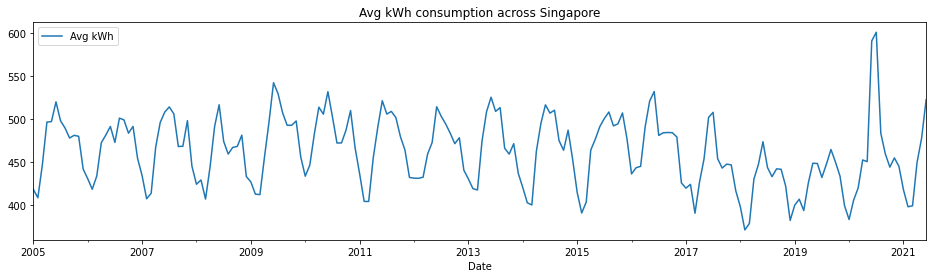

In [86]:
df_overall['Avg kWh'].plot(figsize=(16,4),legend=True)
plt.title('Avg kWh consumption across Singapore')
plt.show()

# Here we try to read the electricity tariff to see if it affects consumption

In [87]:
df_tariffs = pd.read_excel('SES_Public_2021_tidy.xlsx', sheet_name='T5.2')
df_tariffs.head()
#Rename cols names
df_tariffs.rename(columns={'tariff_cent_per_kwh':'tarrif per kWh'}, inplace=True)

In [88]:
df_tariffs[['year','month']]=df_tariffs['month'].str.split('-', expand=True)
df_tariffs.sort_values(by=['year', 'month'], inplace=True)
df_tariffs['Date'] = pd.to_datetime(df_tariffs[['year', 'month']].assign(DAY=1))
df_tariffs = df_tariffs.set_index(df_overall['Date'])
df_tariffs.head()

,month,tarrif per kWh,year,Date
Date,,,,
2005-01-01,01,16.7,2005,2005-01-01
2005-02-01,02,16.7,2005,2005-02-01
2005-03-01,03,16.7,2005,2005-03-01
2005-04-01,04,16.1,2005,2005-04-01
2005-05-01,05,16.1,2005,2005-05-01


Text(0.5, 1.0, 'Tarrifs (cents) per kwh across Singapore')

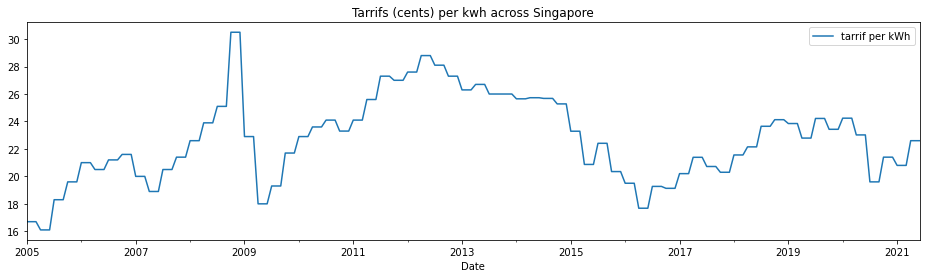

In [89]:
df_tariffs['tarrif per kWh'].plot(figsize=(16,4),legend=True)
plt.title('Tarrifs (cents) per kwh across Singapore')

In [90]:
df_combine = pd.concat([df_overall, df_tariffs], axis=1)

In [91]:
df_combine.head(3)
df_combine['Avg kWh'] = df_combine['Avg kWh'].astype(int)

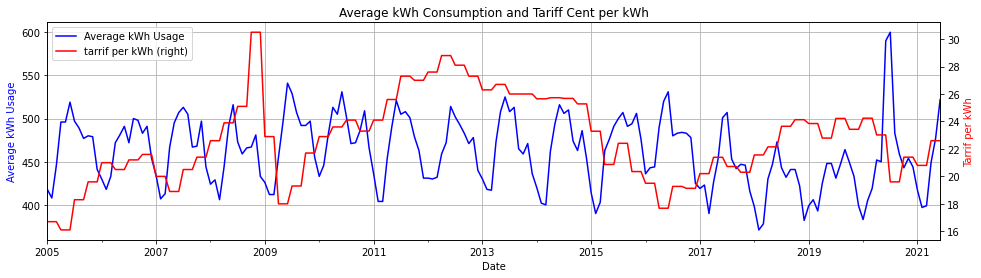

In [92]:
plt.figure(figsize=(16,4))
plt.title('Average kWh Consumption and Tariff Cent per kWh')
ax1 = df_combine['Avg kWh'].plot(color='blue', grid=True, label='Average kWh Usage')
ax2 = df_combine['tarrif per kWh'].plot(color='red', grid=True,  secondary_y=True, label='tarrif per kWh')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_ylabel('Average kWh Usage', color='b')
ax2.set_ylabel('Tarrif per kWh', color='r')
plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [93]:
df_combine.corr()

,Year,Avg kWh,tarrif per kWh
Year,1.000000,-0.237497,0.109487
Avg kWh,-0.237497,1.000000,-0.062751
tarrif per kWh,0.109487,-0.062751,1.000000


# Increase in electricity tariffs does not really affect consumption. We do realize some fun facts, such as during 2008-2009 crisis, tariffs of electricity shot up, and during COVID-19, the consumption of electricity also shot up

# Now, lets go back to our main dataset and continue our EDA

<AxesSubplot:>

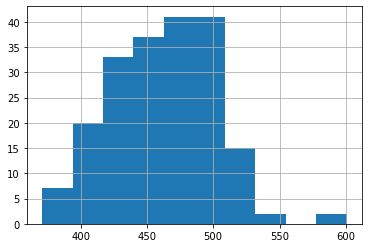

In [94]:
df_overall['Avg kWh'].hist()

In [95]:
#Remove irrelevant/aggregated rows
df = df[df['Month']!='Annual']
df = df[df['Region']!='Overall']
df = df[df['Dwelling Type']!='Overall']
df = df[df['Towns']!='Overall']
df = df[df['Avg kWh']!='s']
#Done with electricity data for now

In [96]:
df["Avg kWh"] = pd.to_numeric(df["Avg kWh"], downcast="integer")

In [97]:
df['Avg kWh'].describe()

count    60568.000000
mean       565.309392
std        429.282967
min          0.000000
25%        321.000000
50%        440.900000
75%        689.700000
max       7161.319423
Name: Avg kWh, dtype: float64

<AxesSubplot:>

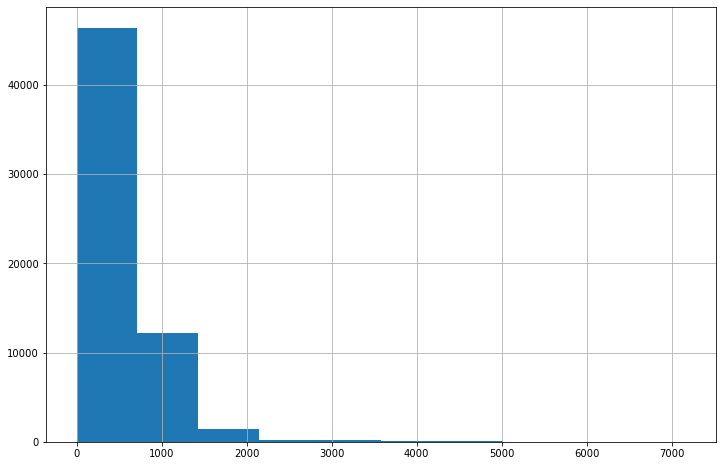

In [98]:
df['Avg kWh'].hist(figsize=(12,8))

<AxesSubplot:ylabel='Region'>

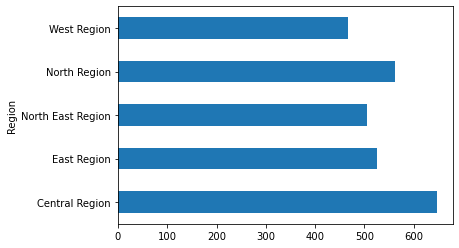

In [99]:
region_avg_kWh = df.groupby(['Region']).mean()['Avg kWh']
region_avg_kWh.plot.barh()

<AxesSubplot:ylabel='Dwelling Type'>

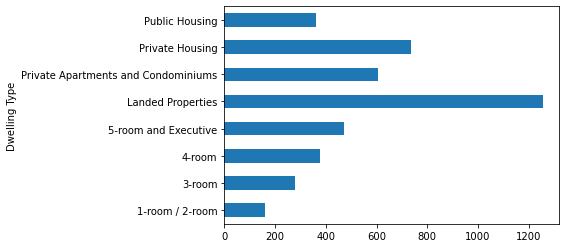

In [100]:
dwelling_type_avg_kWh = df.groupby(['Dwelling Type']).mean()['Avg kWh']
dwelling_type_avg_kWh.plot.barh()

<AxesSubplot:ylabel='Towns'>

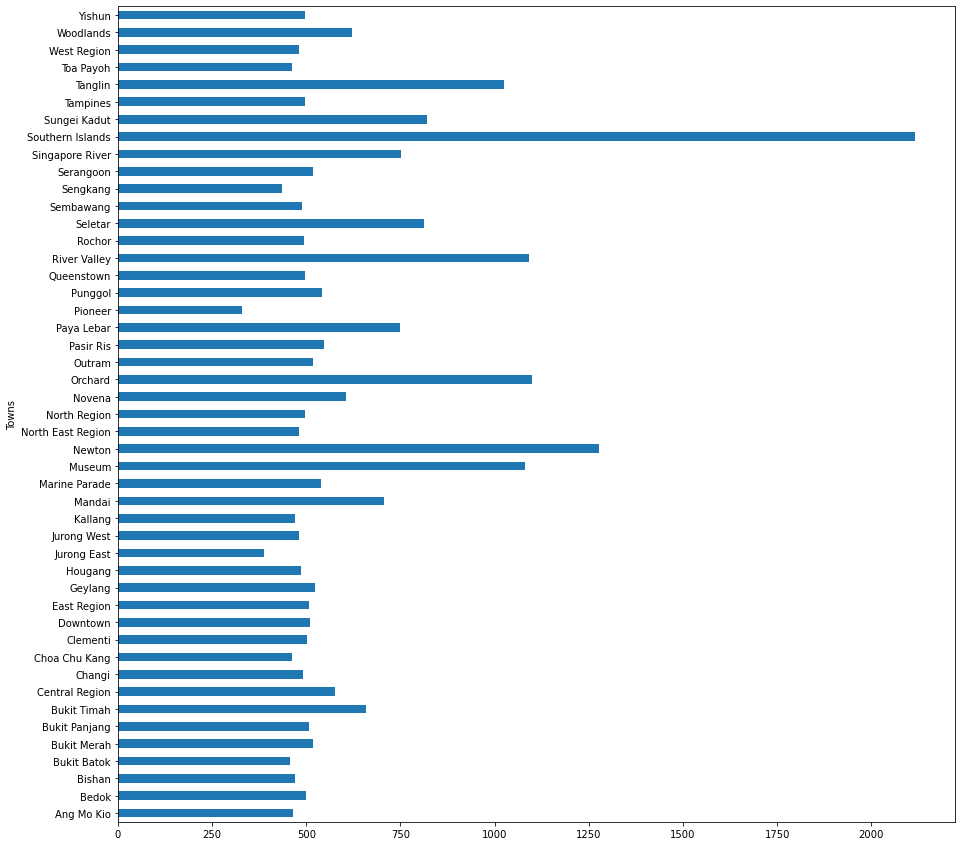

In [101]:
towns_avg_kWh = df.groupby(['Towns']).mean()['Avg kWh']
towns_avg_kWh.plot.barh(figsize=(15,15))